  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-tpg0zf4q/prml_ed5d0dbd3cc547f489b2dc1393851cc1
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-tpg0zf4q/prml_ed5d0dbd3cc547f489b2dc1393851cc1
  Resolved https://github.com/pantelis-classes/PRML.git to commit 14cf88538d2704fd18b391ae6309fb38c65a6412
  Preparing metadata (setup.py) ... done


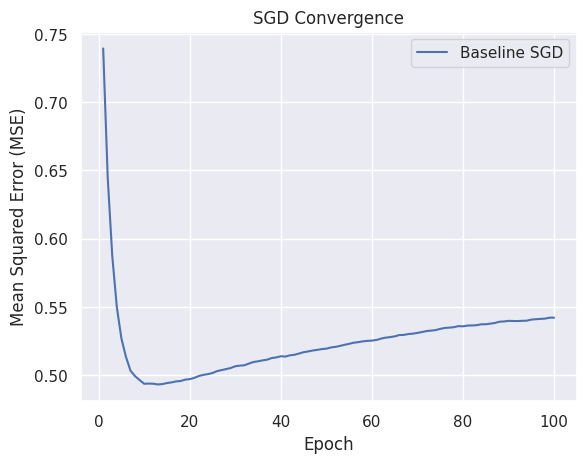

In [ ]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

sns.set_theme()

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)
def baseline_sgd(X, y, learning_rate=0.01, n_epochs=100, batch_size=1):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    losses = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients

        loss = np.mean((X.dot(theta) - y)**2)
        losses.append(loss)

    return theta, losses

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
X_train = np.c_[np.ones((10, 1)), x_train]

# Hyperparameters
learning_rate_baseline = 0.01
n_epochs_baseline = 100
batch_size_baseline = 1

theta_baseline, losses_baseline = baseline_sgd(X_train, y_train, learning_rate_baseline, n_epochs_baseline, batch_size_baseline)

plt.plot(range(1, n_epochs_baseline + 1), losses_baseline, label='Baseline SGD')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('SGD Convergence')
plt.show()